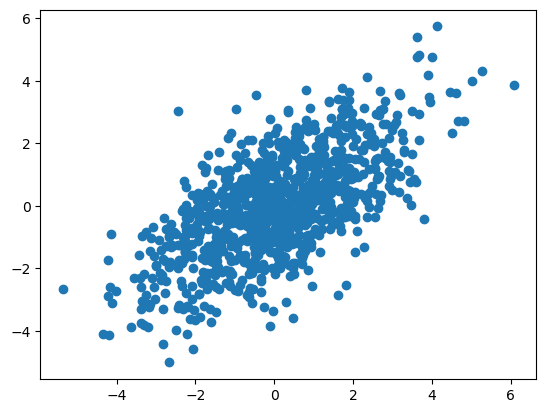

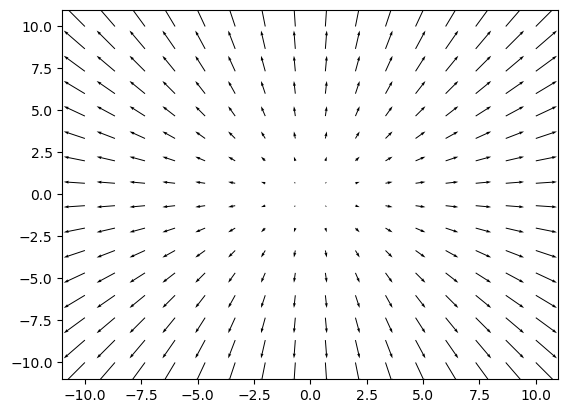

(2, 256)
vals [4.60307792 0.97448374]
vecs [[ 0.71206549 -0.70211305]
 [ 0.70211305  0.71206549]]


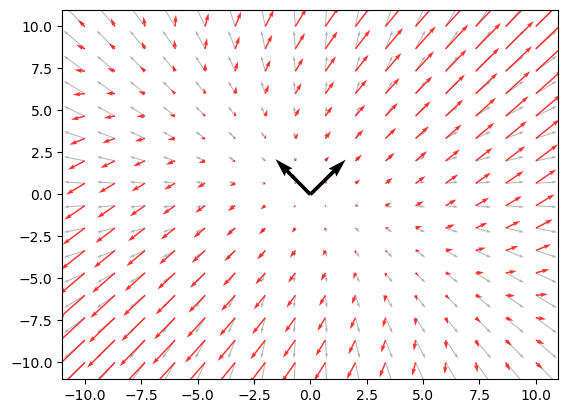

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
mean = [0, 0]  # means for x and y
cov = [[3, 2],    # var(x)=1, cov(x,y)=2
       [2, 3]]    # cov(y,x)=2, var(y)=5

data = np.random.multivariate_normal(mean, cov, N)
x = data[:, 0:1]  
y = data[:, 1:2]  

data_centered = data - np.mean(data, axis=0)
data_cov = 1/(N-1) * (data_centered.T @ data_centered)


plt.scatter(x, y)
plt.show()

x = np.linspace(-10, 10, 16)
y = np.linspace(-10, 10, 16)
X, Y = np.meshgrid(x, y)

U_orig = X
V_orig = Y  
plt.quiver(X, Y, U_orig, V_orig, alpha=1, color='black', width=0.002)
plt.show()


trans = data_cov @ np.vstack((X.reshape(1, -1), Y.reshape(1, -1)))



print(trans.shape)  # Should be (2, 64)
U_trans = trans[0,:].reshape(X.shape)
V_trans = trans[1,:].reshape(Y.shape) 
plt.quiver(X, Y, U_orig, V_orig, alpha=0.6, color='gray', width=0.002)
plt.quiver(X, Y, U_trans, V_trans, alpha=0.8, color='red', width=0.003)
vals, vecs = np.linalg.eig(data_cov)
print(f'vals {vals}')
print(f'vecs {vecs}')
plt.quiver(0, 0, vecs[0,0], vecs[1,0], scale=5)
plt.quiver(0, 0, vecs[0,1], vecs[1,1], scale=5)
plt.show()

# lets plot the eigenvectors



vals [1.05870313 5.15140965]
vecs [[-0.73762502 -0.67521059]
 [ 0.67521059 -0.73762502]]


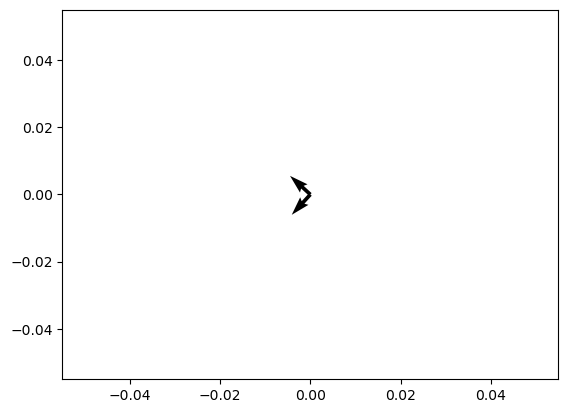

In [68]:
vals, vecs = np.linalg.eig(data_cov)
print(f'vals {vals}')
print(f'vecs {vecs}')
plt.quiver(0, 0, vecs[0,0], vecs[1,0])
plt.quiver(0, 0, vecs[0,1], vecs[1,1])


In [37]:
print("Sample means:", np.mean(data, axis=0))
print("Manual covariance:", 1/(N-1) * (data.T @ data))
print("NumPy covariance:", np.cov(data.T))

Manual (centered): [[3.96627903 2.67923055]
 [2.67923055 3.40126101]]
NumPy covariance: [[3.96627903 2.67923055]
 [2.67923055 3.40126101]]
Difference: [[0. 0.]
 [0. 0.]]


In [42]:
# Our data's covariance matrix can also be visualized as a linear transformation!


array([[2.95379484, 1.92245411],
       [1.92245411, 3.06720899]])

(2, 256)


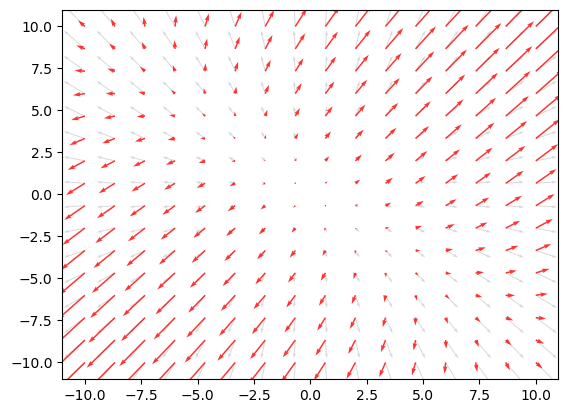

In [ ]:
XY = ).shape

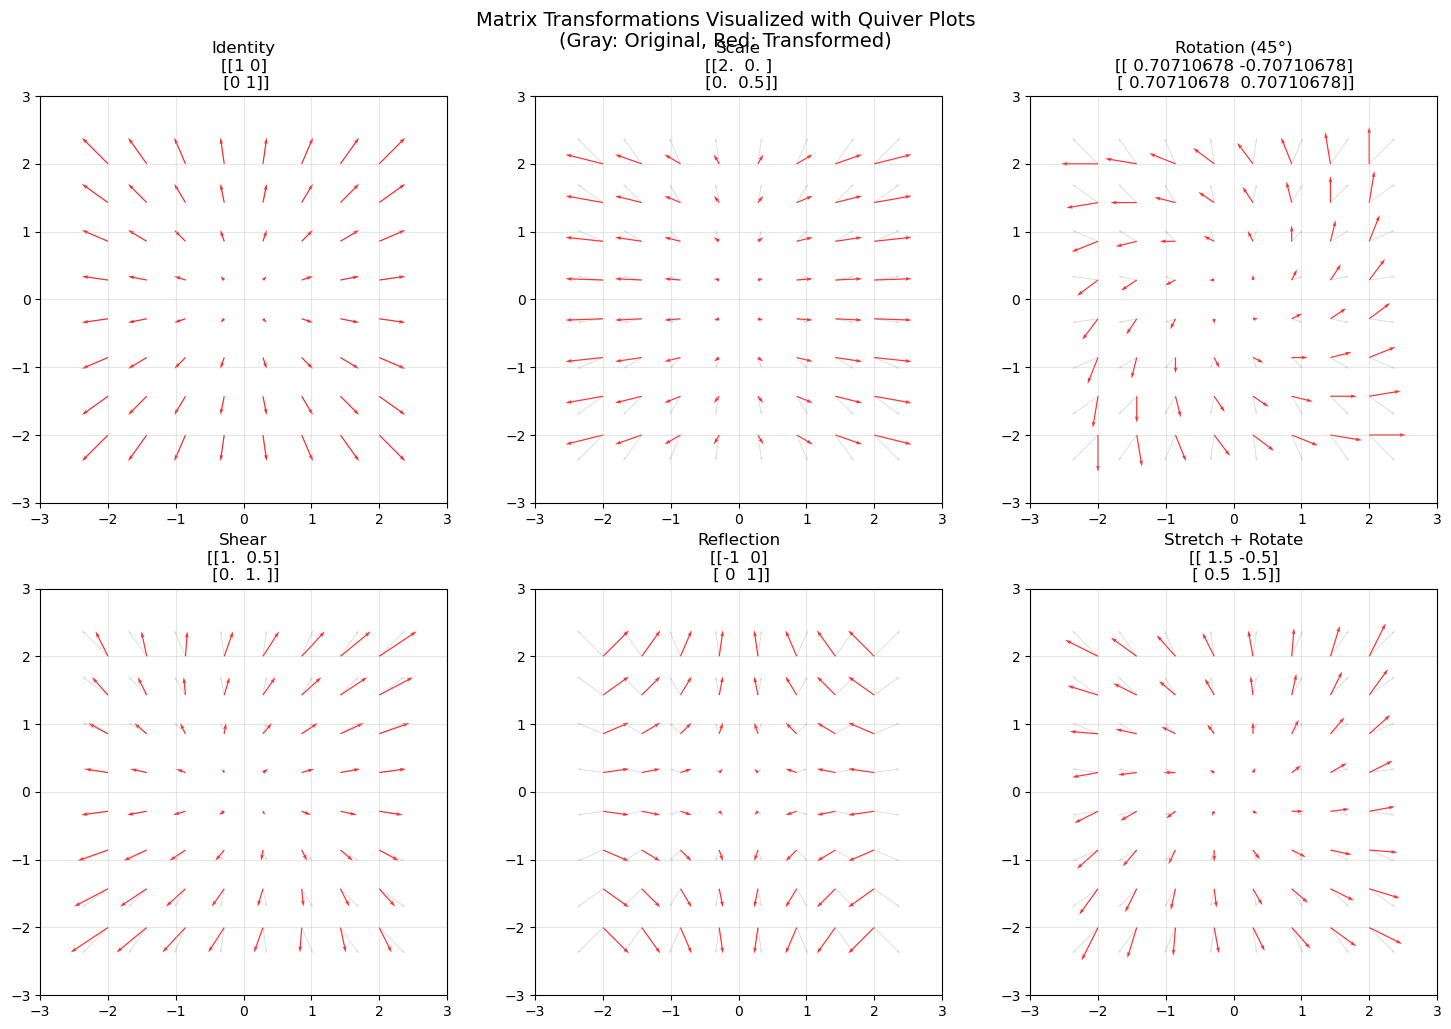

In [46]:
# Lets visualize some different matrix transforms with quiver 
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of vectors to transform
x = np.linspace(-2, 2, 8)
y = np.linspace(-2, 2, 8)
X, Y = np.meshgrid(x, y)

# Original vector field (identity - no transformation)
U_orig = X
V_orig = Y

# Define some interesting transformation matrices
transformations = {
    'Identity': np.array([[1, 0], 
                         [0, 1]]),
    
    'Scale': np.array([[2, 0], 
                      [0, 0.5]]),
    
    'Rotation (45°)': np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)], 
                               [np.sin(np.pi/4), np.cos(np.pi/4)]]),
    
    'Shear': np.array([[1, 0.5], 
                      [0, 1]]),
    
    'Reflection': np.array([[-1, 0], 
                           [0, 1]]),
    
    'Stretch + Rotate': np.array([[1.5, -0.5], 
                                 [0.5, 1.5]])
}

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (name, matrix) in enumerate(transformations.items()):
    ax = axes[i]
    
    # Apply transformation to each vector
    vectors = np.stack([X.flatten(), Y.flatten()])  # Shape: (2, n_vectors)
    transformed = matrix @ vectors  # Matrix multiplication
    
    # Reshape back to grid
    U_trans = transformed[0].reshape(X.shape)
    V_trans = transformed[1].reshape(Y.shape)
    
    # Plot original vectors in light gray
    ax.quiver(X, Y, U_orig, V_orig, alpha=0.3, color='gray', width=0.002)
    
    # Plot transformed vectors in color
    ax.quiver(X, Y, U_trans, V_trans, alpha=0.8, color='red', width=0.003)
    
    ax.set_title(f'{name}\n{matrix}')
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')

plt.tight_layout()
plt.suptitle('Matrix Transformations Visualized with Quiver Plots\n(Gray: Original, Red: Transformed)', 
             fontsize=14, y=1.02)
plt.show()

